In [31]:
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
from matplotlib.markers import MarkerStyle

In [2]:
def sex(df):
    for i in range(df.shape[0]):
        df.iloc[i, 1] = 0 if df.iloc[i, 1] == 'M' else 1
    return df


# encoding ChestPainType into integer: [ASY -> 0, NAP -> 1, ATA -> 2, TA -> 3]
def chest_pain_type(df):
    for i in range(df.shape[0]):
        if df.iloc[i, 2] == 'ASY':
            df.iloc[i, 2] = 0
        elif df.iloc[i, 2] == 'NAP':
            df.iloc[i, 2] = 1
        elif df.iloc[i, 2] == 'ATA':
            df.iloc[i, 2] = 2
        else:
            df.iloc[i, 2] = 3
    return df


# encoding RestingECG into integer: [Normal -> 0, LVH -> 1, ST -> 2]
def RestingECG(df):
    for i in range(df.shape[0]):
        if df.iloc[i, 6] == 'Normal':
            df.iloc[i, 6] = 0
        elif df.iloc[i, 6] == 'LVH':
            df.iloc[i, 6] = 1
        else:
            df.iloc[i, 6] = 2
    return df


# encoding ExerciseAngina into binary: [N -> 0, Y -> 1]
def ExerciseAngina(df):
    for i in range(df.shape[0]):
        df.iloc[i, 8] = 0 if df.iloc[i, 6] == 'N' else 1
    return df


# encoding ST_Slope into integer: [Up -> 0, Flat -> 1, Down -> 2]
def ST_Slope(df):
    for i in range(df.shape[0]):
        if df.iloc[i, 10] == 'Up':
            df.iloc[i, 10] = 0
        elif df.iloc[i, 10] == 'Flat':
            df.iloc[i, 10] = 1
        else:
            df.iloc[i, 10] = 2
    return df


def split(df):
    train, test = train_test_split(df, test_size=0.33, random_state=1)
    return train, test


In [3]:
data = pd.read_csv("../data/heart_disease.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
train, test = split(ST_Slope(ExerciseAngina(RestingECG(chest_pain_type(sex(data))))))

In [5]:
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
246,54,0,1,120,237,0,0,150,1,1.5,1,1
354,55,0,0,120,0,0,2,92,1,0.3,0,1
799,53,0,1,130,246,1,1,173,1,0.0,0,0
40,54,1,2,150,230,0,0,130,1,0.0,0,0
89,55,0,0,140,229,0,0,110,1,0.5,1,0


In [6]:
test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
900,58,0,0,114,318,0,2,140,1,4.4,2,1
570,56,0,0,128,223,0,2,119,1,2.0,2,1
791,51,0,0,140,298,0,0,122,1,4.2,1,1
189,53,0,0,180,285,0,2,120,1,1.5,1,1
372,63,0,0,185,0,0,0,98,1,0.0,0,1


## Heat map

In [9]:
data.values[-1]

array([38, 0, 1, 138, 175, 0, 0, 173, 1, 0.0, 0, 0], dtype=object)

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399     0.095282   0.198039  0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193  0.112135  0.164803   
Cholesterol   0.095282   0.100893     1.000000   0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193     0.260974   1.000000  0.131438  0.052698   
MaxHR         0.382045   0.112135     0.235792   0.131438  1.000000  0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698  0.160691  1.000000   
HeartDisease  0.282039   0.107589     0.232741   0.267291  0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol       0.232741  
FastingBS         0.267291  
MaxHR             0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  
[0.28203851 0.10758898 0.23274064 0.26729119 0.40042077 0.40395072
 1.        ]
[6, 5, 4, 0, 3, 2, 1]


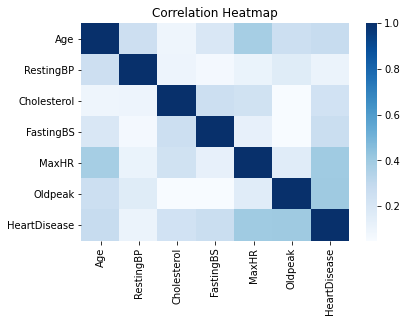

In [13]:
def plot_heatmap(df):
    corr = df.corr().abs()
    print(corr)
    print(corr.values[-1])
    corrY = corr.values[-1]
    tmp = sorted(range(len(corrY)), key=lambda k: -corrY[k])
    print(tmp)
    # plt.subplots(figsize=(15,15))
    sb.heatmap(corr, cmap='Blues')
    plt.title("Correlation Heatmap")
    plt.show()

plot_heatmap(data)

## Scatter plot between each two features: 
Red: heart disease\
  Black: no heart disease

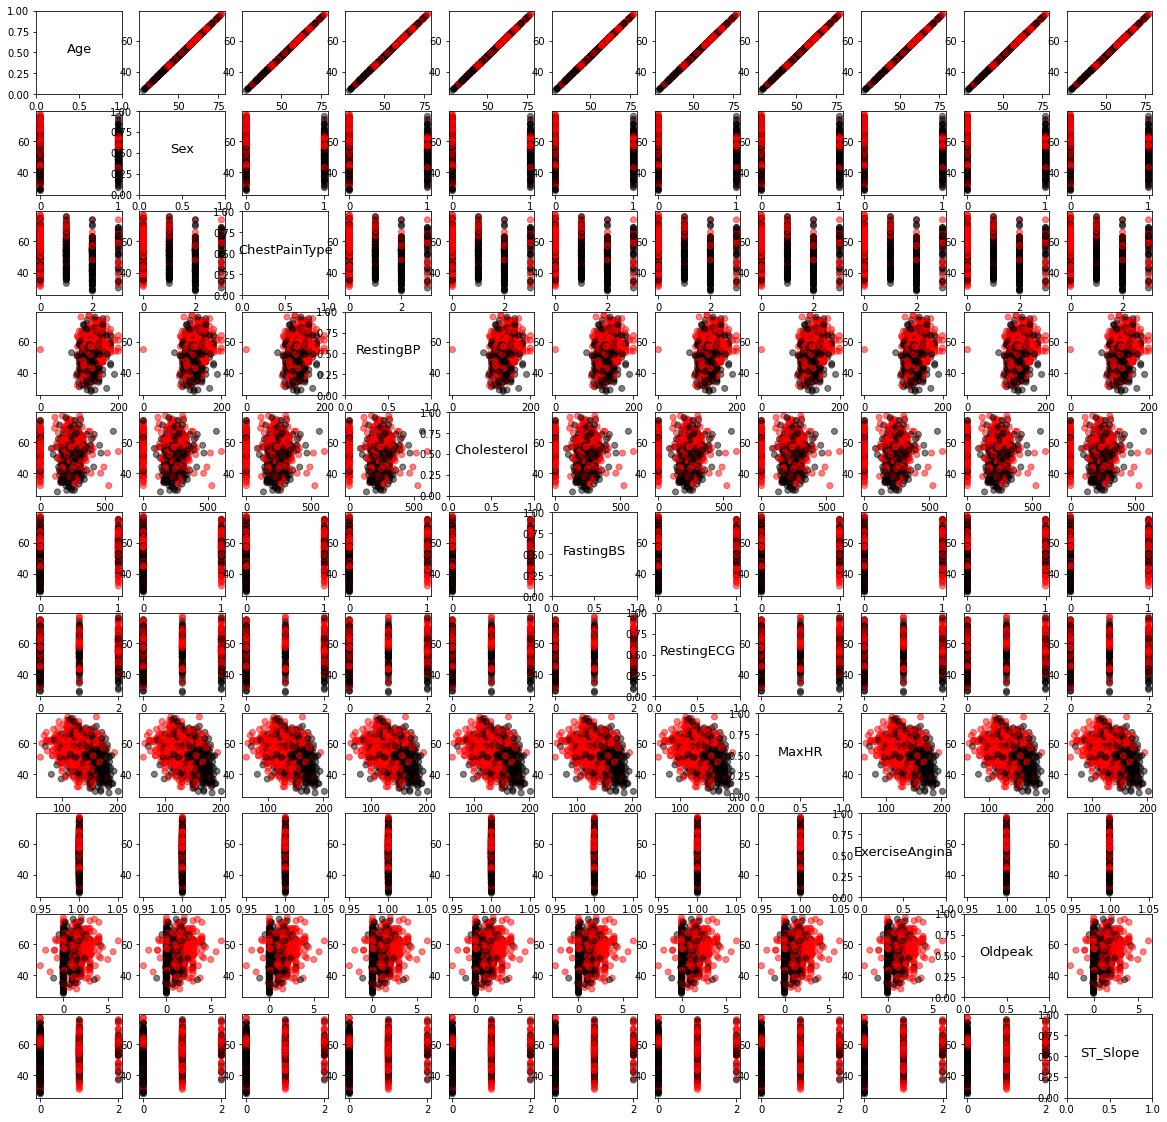

In [54]:
columns = data.columns
count = 1
n = len(columns)-1
plt.subplots(figsize=(20,20))
colors = {0: 'black', 1: 'red'}
for i in range(n):
  for j in range(n):
    plt.subplot(n,n,count)
    count+=1
    if i == j:
      plt.text(0.5, 0.5, columns[i],fontsize=13, ha='center')
    else:
      plt.scatter(data[columns[i]], data['Age'], c = data['HeartDisease'].map(colors),  alpha=0.5)
